In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import json
import random
sn.set_theme(style="ticks")
import warnings
warnings.filterwarnings('ignore')

from notebook_functions import *

In [35]:
def iterations_count_from_validation_full_prompt(content: str) -> int:
    return content.count("Write only:")


In [30]:
df = pd.read_csv("metrics_results/gpto_paper_mini.csv")

In [33]:
df

,instance_id,ground_truth_plan,goal_achieved,content,actions_text,actions_possible,n_actions,ground_truth_n_actions,all_possible_actions,correct_response,n_run,method,method_name,iter_mode,n_iterations,distance_to_ground_truth,distance_to_init
0,1657,(unstack b a)\n(put-down b)\n(unstack a c)\n(s...,False,human: I am playing with a set of blocks where...,pick up blue block.put down blue block.unstack...,0.0.0.0.0.0.0.0,8,10,False,False,1,0,Full Plan Prompt,0,1,10,0
1,1819,(unstack d c)\n(put-down d)\n(unstack c a)\n(p...,False,human: I am playing with a set of blocks where...,pick up yellow block.put down yellow block,0.0,2,12,False,False,1,0,Full Plan Prompt,0,1,12,0
2,831,(unstack b d)\n(stack b a)\n,False,human: I am playing with a set of blocks where...,pick up blue block.put down blue block.pick up...,0.0.0.0.0.0,6,2,False,False,1,0,Full Plan Prompt,0,1,2,0
3,1280,(unstack d a)\n(stack d c)\n(unstack a b)\n(pu...,False,human: I am playing with a set of blocks where...,pick up yellow block.put down yellow block.pic...,0.0.0.0.0,5,10,False,False,1,0,Full Plan Prompt,0,1,10,0
4,1451,(pick-up d)\n(stack d b)\n,True,human: I am playing with a set of blocks where...,pick up the blue block.put down the blue block...,0.0.1.1,4,2,False,False,1,0,Full Plan Prompt,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,831,(unstack b d)\n(stack b a)\n,False,human: I am playing with a set of blocks where...,no_action,0,1,2,True,False,1,3,Validation Iterative Actions,0,1,2,0
66,1280,(unstack d a)\n(stack d c)\n(unstack a b)\n(pu...,False,human: I am playing with a set of blocks where...,unstack the yellow block from on top of the re...,1.1.1.1.1.1.1.1.1.0,10,10,True,False,1,3,Validation Iterative Actions,0,10,11,9
67,1451,(pick-up d)\n(stack d b)\n,False,human: I am playing with a set of blocks where...,no_action,0,1,2,True,False,1,3,Validation Iterative Actions,0,1,2,0
68,1447,(unstack a b)\n(put-down a)\n(unstack d c)\n(p...,False,human: I am playing with a set of blocks where...,unstack the red block from on top of the blue ...,1.1.1.0.0.1.0.1.1.1,10,6,True,False,1,3,Validation Iterative Actions,0,10,7,3


In [41]:
example = df[df["method"] == 2].iloc[1]
example

instance_id                                                              1819
ground_truth_plan           (unstack d c)\n(put-down d)\n(unstack c a)\n(p...
goal_achieved                                                           False
content                     human: I am playing with a set of blocks where...
actions_text                unstack the yellow block from on top of the or...
actions_possible                              1.0.1.1.1.0.1.0.0.0.0.0.0.0.0.0
n_actions                                                                  16
ground_truth_n_actions                                                     12
all_possible_actions                                                    False
correct_response                                                        False
n_run                                                                       1
method                                                                      2
method_name                                                 Iter

In [39]:
print(example["content"])

human: I am playing with a set of blocks where I need to arrange the blocks into stacks. Here are the actions I can do

Pick up a block
Unstack a block from on top of another block
Put down a block
Stack a block on top of another block

I have the following restrictions on my actions:
I can only pick up or unstack one block at a time.
I can only pick up or unstack a block if my hand is empty.
I can only pick up a block if the block is on the table and the block is clear. A block is clear if the block has no other blocks on top of it and if the block is not picked up.
I can only unstack a block from on top of another block if the block I am unstacking was really on top of the other block.
I can only unstack a block from on top of another block if the block I am unstacking is clear.
Once I pick up or unstack a block, I am holding the block.
I can only put down a block that I am holding.
I can only stack a block on top of another block if I am holding the block being stacked.
I can only s

In [19]:
df[df["method"] == 3].iloc[0]

instance_id                                                              1657
ground_truth_plan           (unstack b a)\n(put-down b)\n(unstack a c)\n(s...
goal_achieved                                                           False
content                     human: I am playing with a set of blocks where...
actions_text                unstack the blue block from on top of the red ...
actions_possible                                                        1.1.0
n_actions                                                                   3
ground_truth_n_actions                                                     10
correct_response                                                        False
n_run                                                                       1
method                                                                      3
all_possible_actions                                                      NaN
method_name                                      Validation Iter

In [21]:
print(df[df["method"] == 4].iloc[0]["content"])

human: I am playing with a set of blocks where I need to arrange the blocks into stacks. Here are the actions I can do

Pick up a block
Unstack a block from on top of another block
Put down a block
Stack a block on top of another block

I have the following restrictions on my actions:
I can only pick up or unstack one block at a time.
I can only pick up or unstack a block if my hand is empty.
I can only pick up a block if the block is on the table and the block is clear. A block is clear if the block has no other blocks on top of it and if the block is not picked up.
I can only unstack a block from on top of another block if the block I am unstacking was really on top of the other block.
I can only unstack a block from on top of another block if the block I am unstacking is clear.
Once I pick up or unstack a block, I am holding the block.
I can only put down a block that I am holding.
I can only stack a block on top of another block if I am holding the block being stacked.
I can only s

In [27]:
df = get_df_from_folder("experiments_results/mixtral")

In [28]:
df[df["actions_text"].isna()].groupby("method").count()

,instance_id,ground_truth_plan,goal_achieved,content,actions_text,actions_possible,n_actions,ground_truth_n_actions,all_possible_actions,correct_response,n_run,method_name
method,,,,,,,,,,,,
0,81,81,81,81,0,0,81,81,81,81,81,81
1,119,119,119,119,0,0,119,119,119,119,119,119
2,42,42,42,42,0,0,42,42,42,42,42,42
3,42,42,42,42,0,0,42,42,0,42,42,42


In [29]:
df[(df["actions_text"].isna()) & (df["method"] == 3)]["instance_id"].to_csv("mixtral_validation_iterative_actions.csv")

In [20]:
df = pd.read_csv("metrics_results/2024-04-29.csv")

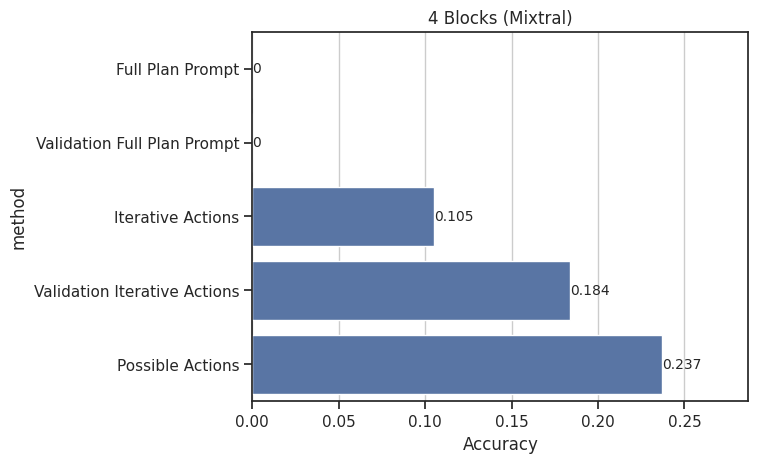

In [19]:
acc_by_method = df.groupby("method", as_index=False)["correct_response"].mean().round(3)
acc_by_method["method"] = acc_by_method["method"].apply(method_number_to_name)
ax = sn.barplot(acc_by_method, x="correct_response", y="method", orient="h")
ax.xaxis.grid(True)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlim([0, max(acc_by_method["correct_response"])+0.05])
ax.set_xlabel("Accuracy");
ax.set_title("4 Blocks (Mixtral)");

In [6]:
acc_by_method_gd_actions = df.groupby(["method", "ground_truth_n_actions"], as_index=False)["correct_response"].mean()
acc_by_method_gd_actions["correct_response"] = acc_by_method_gd_actions["correct_response"].round(3)
acc_by_method_gd_actions["method"] = acc_by_method_gd_actions["method"].apply(method_number_to_name)

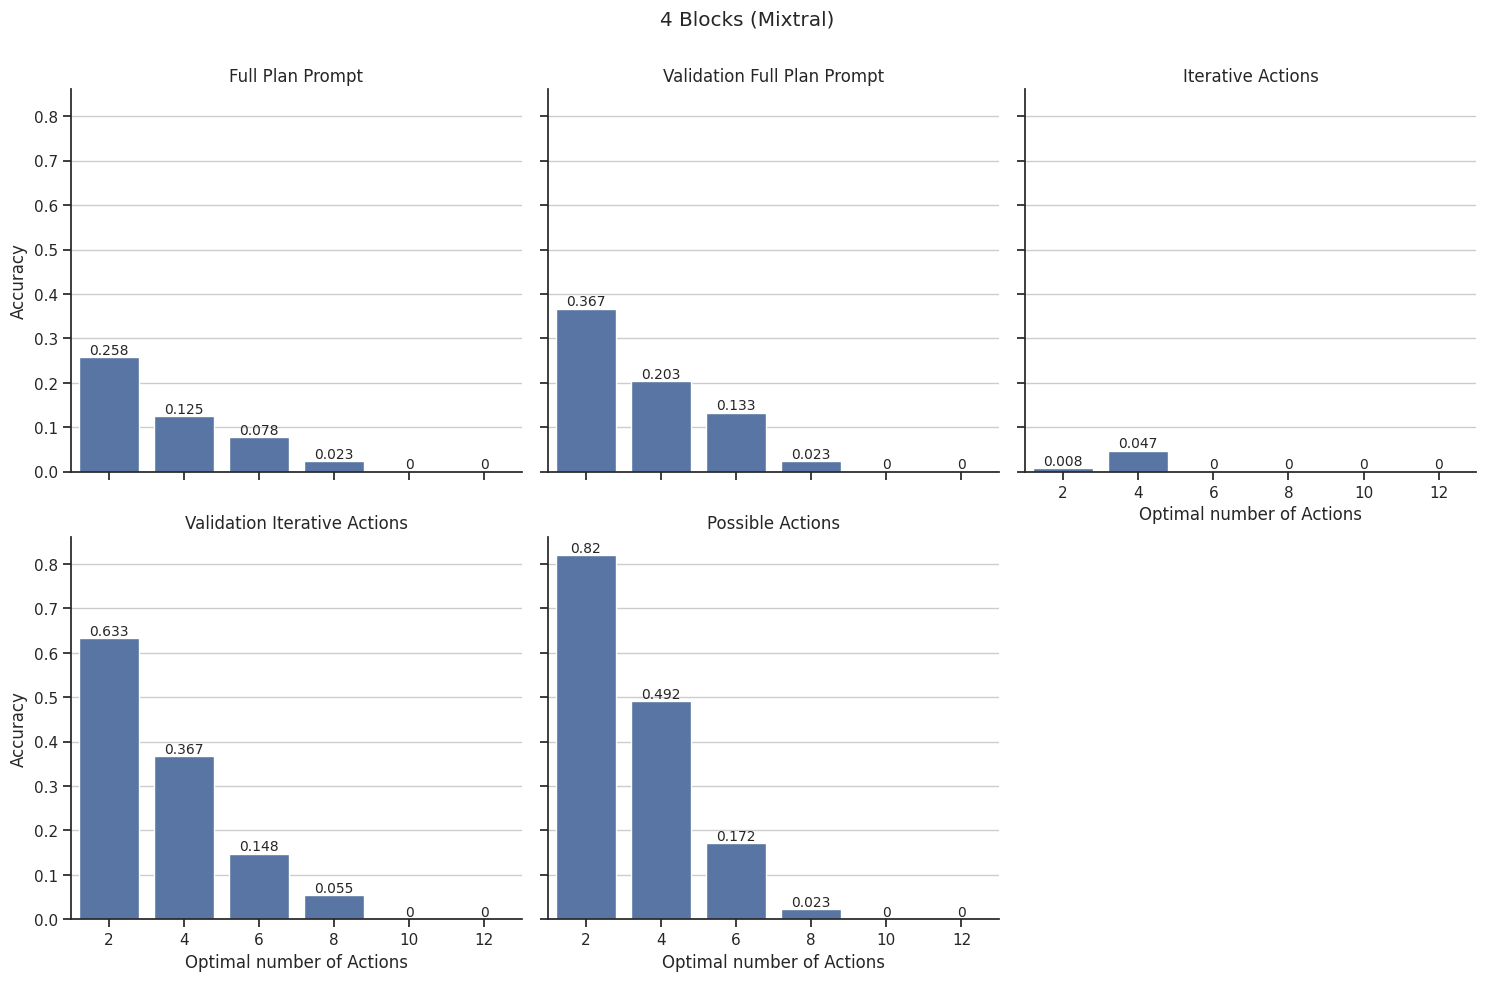

In [7]:
acc_by_method_gd_actions = df.groupby(["method", "ground_truth_n_actions"], as_index=False)["correct_response"].mean()
acc_by_method_gd_actions["correct_response"] = acc_by_method_gd_actions["correct_response"].round(3)
acc_by_method_gd_actions["method"] = acc_by_method_gd_actions["method"].apply(method_number_to_name)
ax = sn.catplot(acc_by_method_gd_actions, col="method", y="correct_response", x="ground_truth_n_actions", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("4 Blocks (Mixtral)");
method_names = list(map(method_number_to_name, [0, 1, 2, 3, 4, 5, 6]))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.yaxis.grid(True)
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Accuracy")

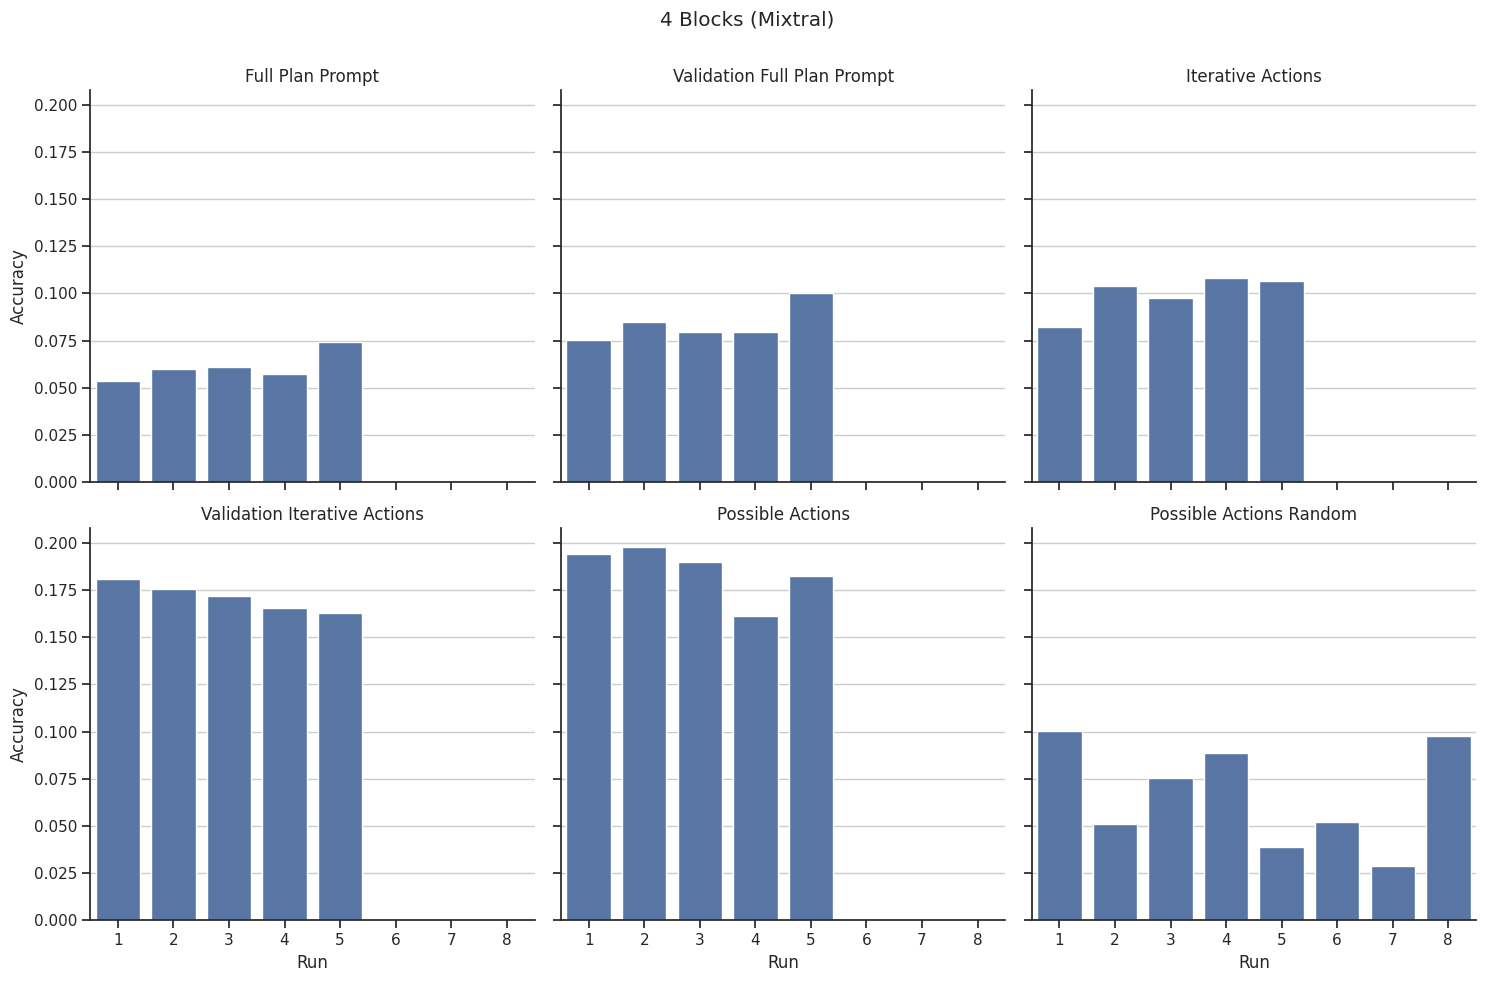

In [9]:
data = df.groupby(["method", "n_run"], as_index=False)["correct_response"].mean()
data_std = data.groupby("method", as_index=False)["correct_response"].std()
data["method"] = data["method"].apply(method_number_to_name)
data_std["method"] = data_std["method"].apply(method_number_to_name)
ax = sn.catplot(data, col="method", y="correct_response", x="n_run", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("4 Blocks (Mixtral)");
method_names = list(map(method_number_to_name, [0, 1, 2, 3, 4, 5, 6]))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.yaxis.grid(True)
    ax.set_xlabel("Run")
    ax.set_ylabel("Accuracy")

In [10]:
data_std

,method,correct_response
0,Full Plan Prompt,0.007867
1,Validation Full Plan Prompt,0.009726
2,Iterative Actions,0.010682
3,Validation Iterative Actions,0.007457
4,Possible Actions,0.014453
5,Possible Actions Random,0.027564


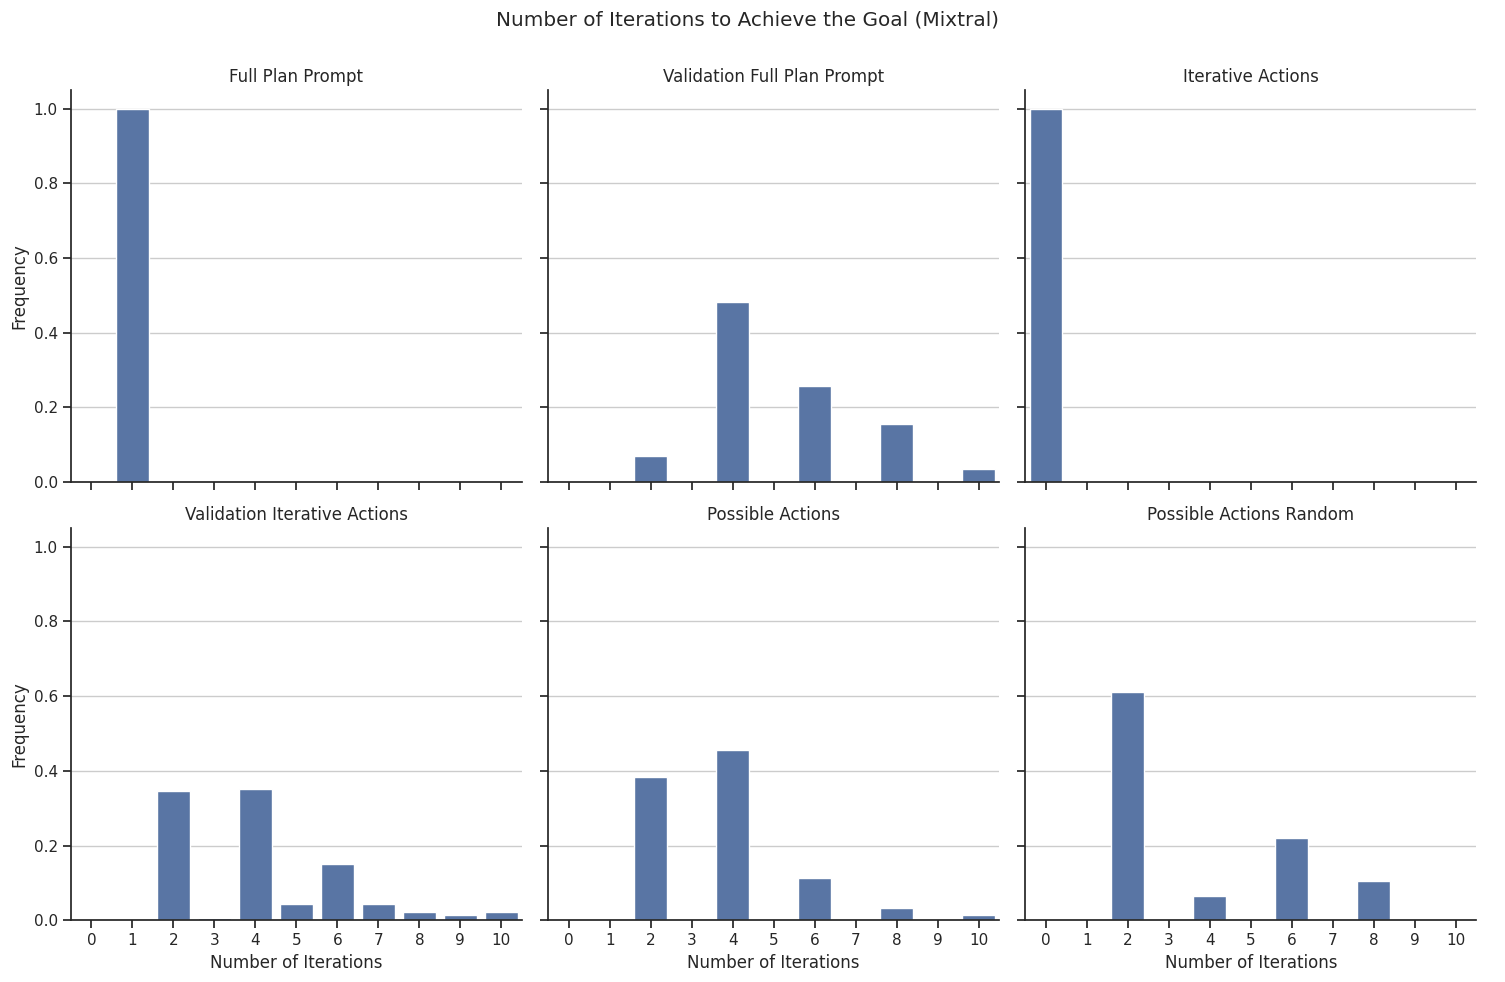

In [63]:
data = df[df["correct_response"] == True]

data_iterations = data[data["method"].isin([1, 3, 4, 5])]
data_iterations["iterations"] = data_iterations["n_actions"]

data_validation_full_plan = data[data["method"] == 2]
data_validation_full_plan["iterations"] = data_validation_full_plan["content"].apply(iterations_count_from_validation_full_prompt)

data_full_plan = data[data["method"] == 0]
data_full_plan["iterations"] = 1

data = pd.concat([data_iterations, data_validation_full_plan, data_full_plan])

method_sum = data.groupby("method", as_index=False)["iterations"].count()
method_sum["method"] = method_sum["method"].apply(method_number_to_name)
iterations_by_method_gd_actions = data.groupby(["method", "iterations"], as_index=False)["correct_response"].count()
iterations_by_method_gd_actions["method"] = iterations_by_method_gd_actions["method"].apply(method_number_to_name)

frequencies = []
for i in range(iterations_by_method_gd_actions.shape[0]):
    row = iterations_by_method_gd_actions.iloc[i]
    method = row["method"]
    sum_iterations = method_sum[method_sum["method"] == method]["iterations"].values[0]
    frequency = row["correct_response"] / sum_iterations
    frequencies.append(frequency)
    
iterations_by_method_gd_actions["correct_response"] = frequencies

ax = sn.catplot(iterations_by_method_gd_actions, col="method", y="correct_response", x="iterations", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("Number of Iterations to Achieve the Goal (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.yaxis.grid(True)
    ax.set_xlabel("Number of Iterations")
    ax.set_ylabel("Frequency")

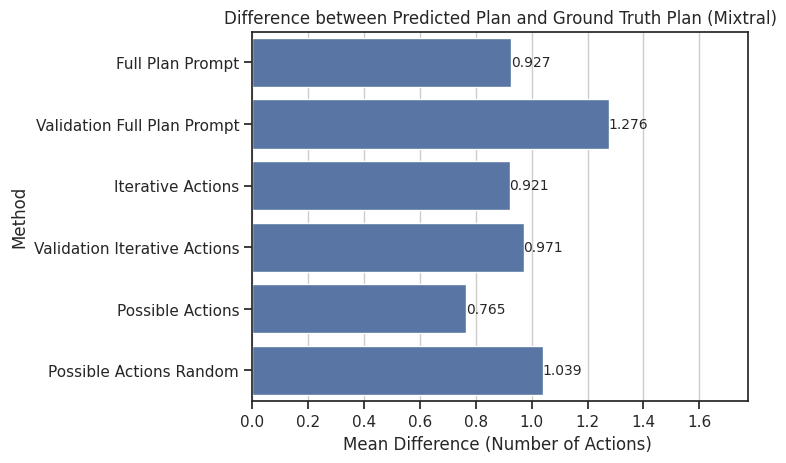

In [64]:
df["diff_actions"] = df["n_actions"] - df["ground_truth_n_actions"]
data = df[df["correct_response"] == True]
data = data.groupby(["method"], as_index=False)["diff_actions"].agg(["mean", "std", "count"]).dropna().round(3)
data["method"] = data["method"].apply(method_number_to_name)

ax = sn.barplot(data, x="mean", y="method", orient="h")
ax.xaxis.grid(True)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlim([0, max(data["mean"])+0.5])
ax.set_xlabel("Mean Difference (Number of Actions) ");
ax.set_ylabel("Method");
ax.set_title("Difference between Predicted Plan and Ground Truth Plan (Mixtral)");

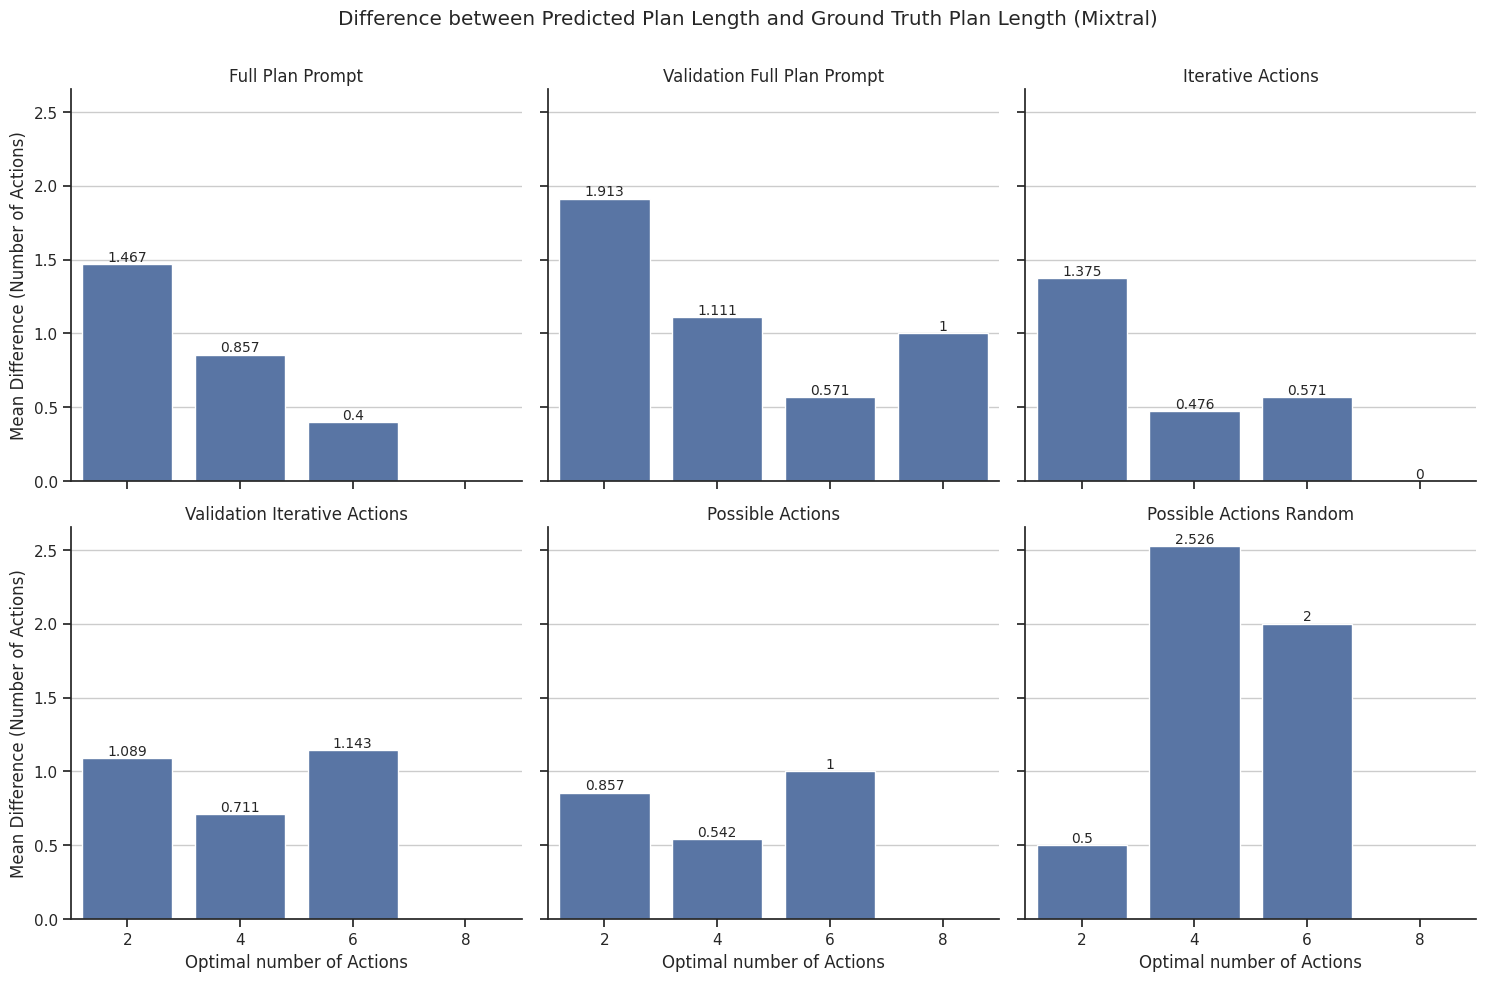

In [4]:
df["diff_actions"] = df["n_actions"] - df["ground_truth_n_actions"]
data = df[df["correct_response"] == True]
data = data.groupby(["method", "ground_truth_n_actions"], as_index=False)["diff_actions"].agg(["mean", "std", "count"]).dropna().round(3)
data["method"] = data["method"].apply(method_number_to_name)

ax = sn.catplot(data, col="method", y="mean", x="ground_truth_n_actions", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("Difference between Predicted Plan Length and Ground Truth Plan Length (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.yaxis.grid(True)
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Mean Difference (Number of Actions)")

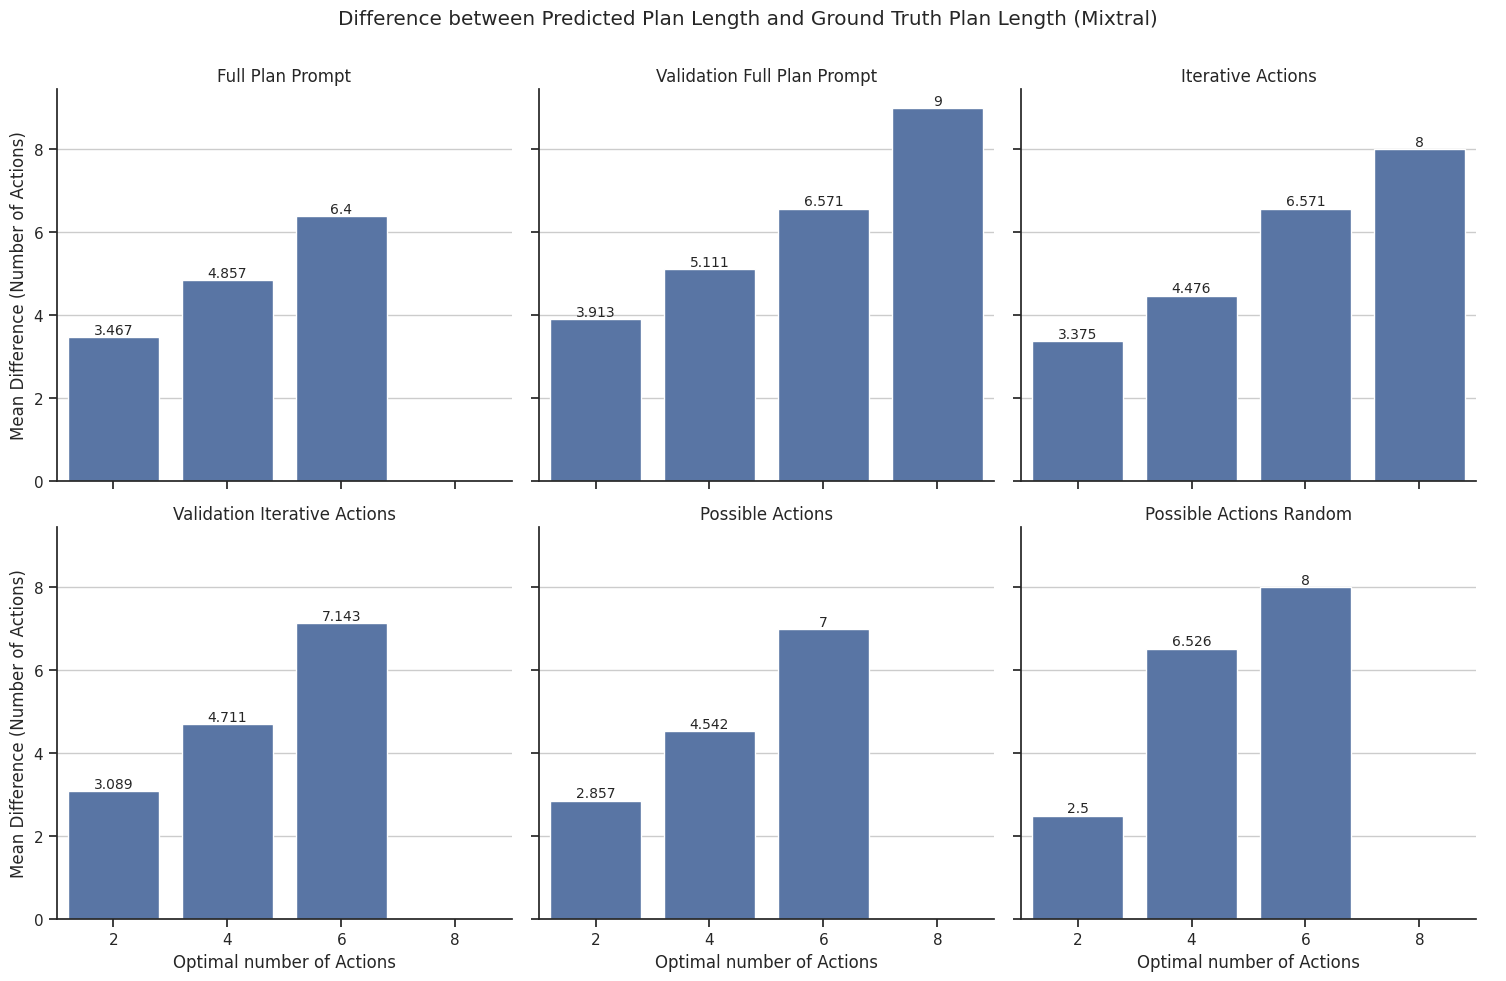

In [5]:
data = df[df["correct_response"] == True]
data = data.groupby(["method", "ground_truth_n_actions"], as_index=False)["n_actions"].agg(["mean", "std", "count"]).dropna().round(3)
data["method"] = data["method"].apply(method_number_to_name)

ax = sn.catplot(data, col="method", y="mean", x="ground_truth_n_actions", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("Difference between Predicted Plan Length and Ground Truth Plan Length (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.yaxis.grid(True)
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Mean Difference (Number of Actions)")

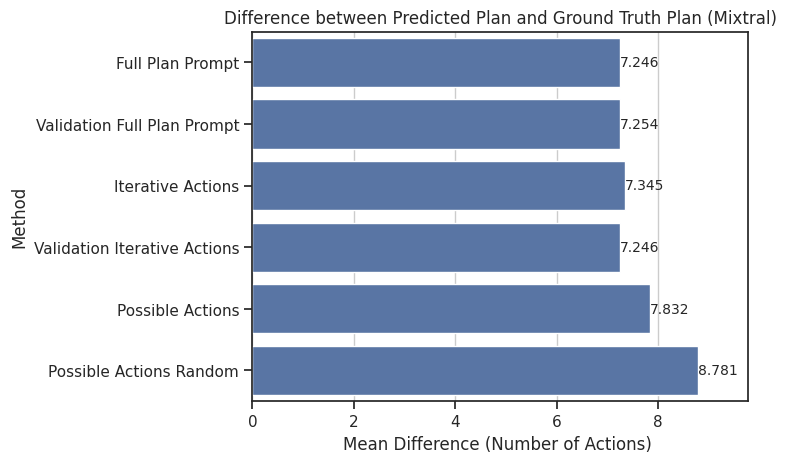

In [70]:
data = df[df["correct_response"] == False]
data = data.groupby(["method"], as_index=False)["distance_to_ground_truth"].agg(["mean", "std", "count"]).dropna().round(3)
data["method"] = data["method"].apply(method_number_to_name)

ax = sn.barplot(data, x="mean", y="method", orient="h")
ax.xaxis.grid(True)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlim([0, max(data["mean"])+1])
ax.set_xlabel("Mean Difference (Number of Actions) ");
ax.set_ylabel("Method");
ax.set_title("Difference between Predicted Plan and Ground Truth Plan (Mixtral)");

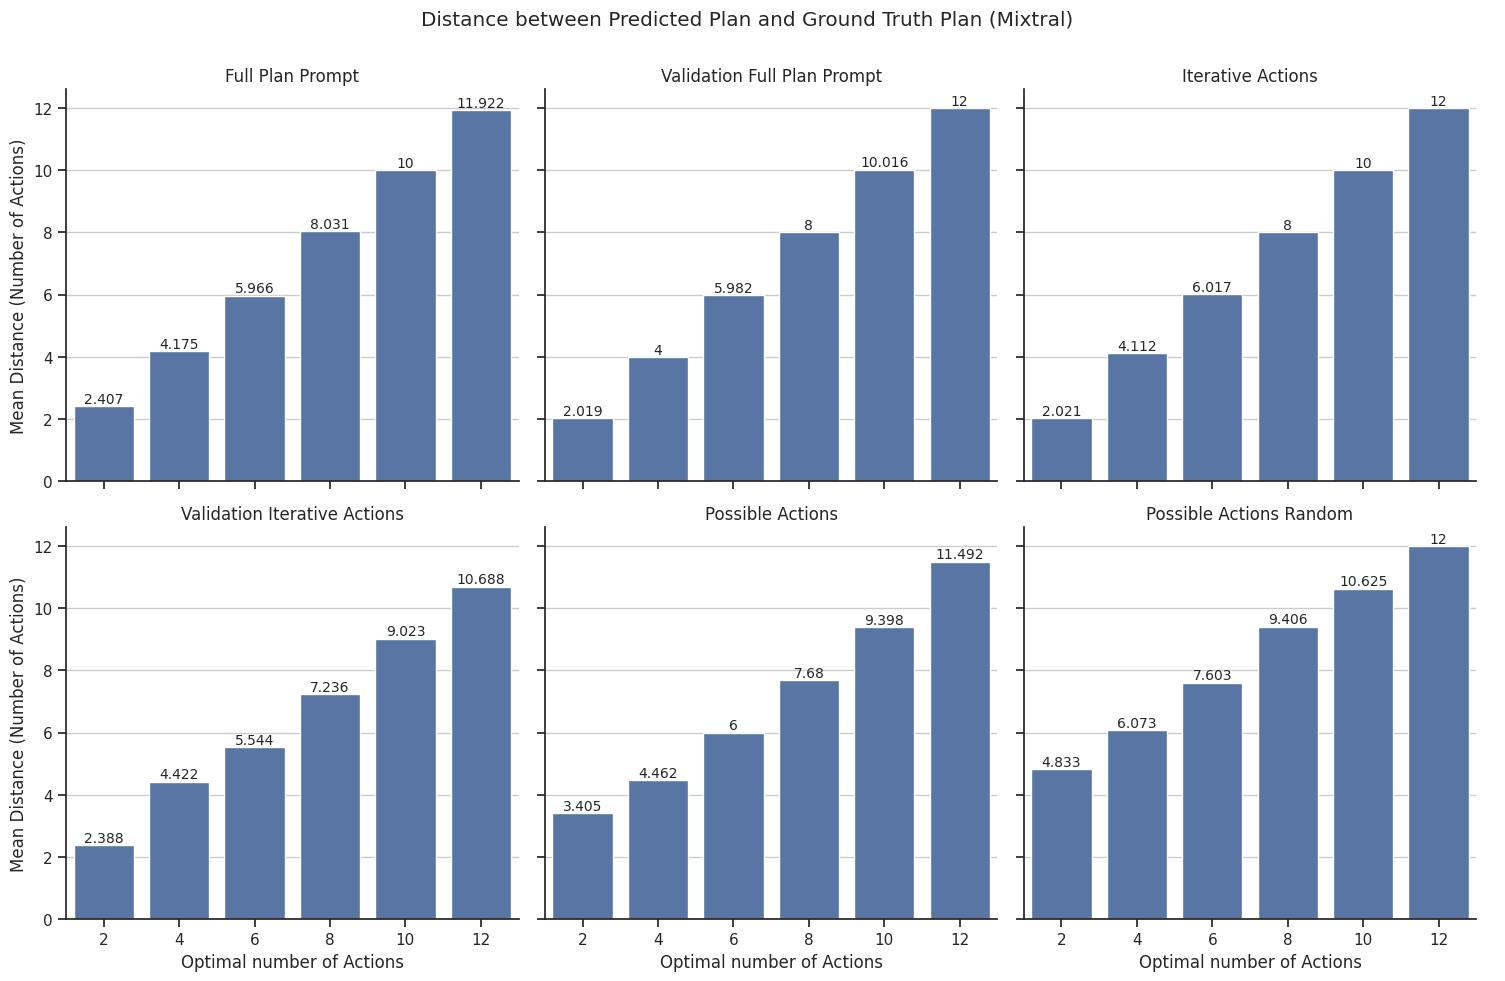

In [6]:
data = df[df["correct_response"] == False]
data = data.groupby(["method", "ground_truth_n_actions"], as_index=False)["distance_to_ground_truth"].agg(["mean", "std", "count", "median"]).dropna().round(3)
data["method"] = data["method"].apply(method_number_to_name)

ax = sn.catplot(data, col="method", y="mean", x="ground_truth_n_actions", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("Distance between Predicted Plan and Ground Truth Plan (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.yaxis.grid(True)
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Mean Distance (Number of Actions)")

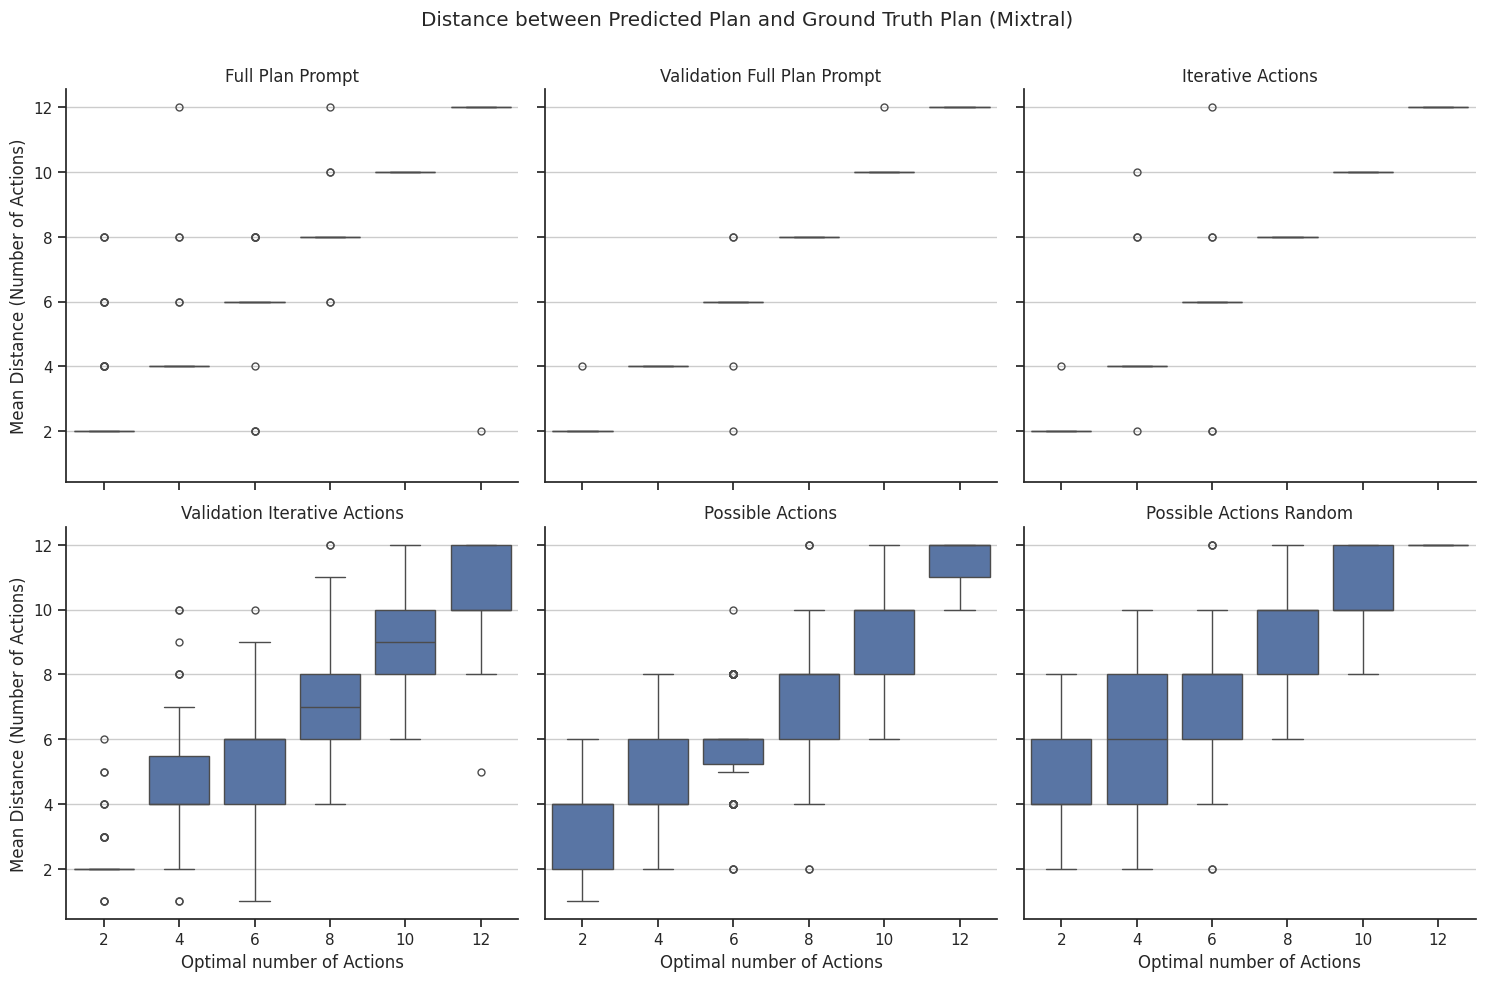

In [29]:
data = df[df["correct_response"] == False]
#data["method"] = data["method"].apply(method_number_to_name)

ax = sn.catplot(data, col="method", y="distance_to_ground_truth", x="ground_truth_n_actions", kind="box", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("Distance between Predicted Plan and Ground Truth Plan (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.yaxis.grid(True)
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Mean Distance (Number of Actions)")

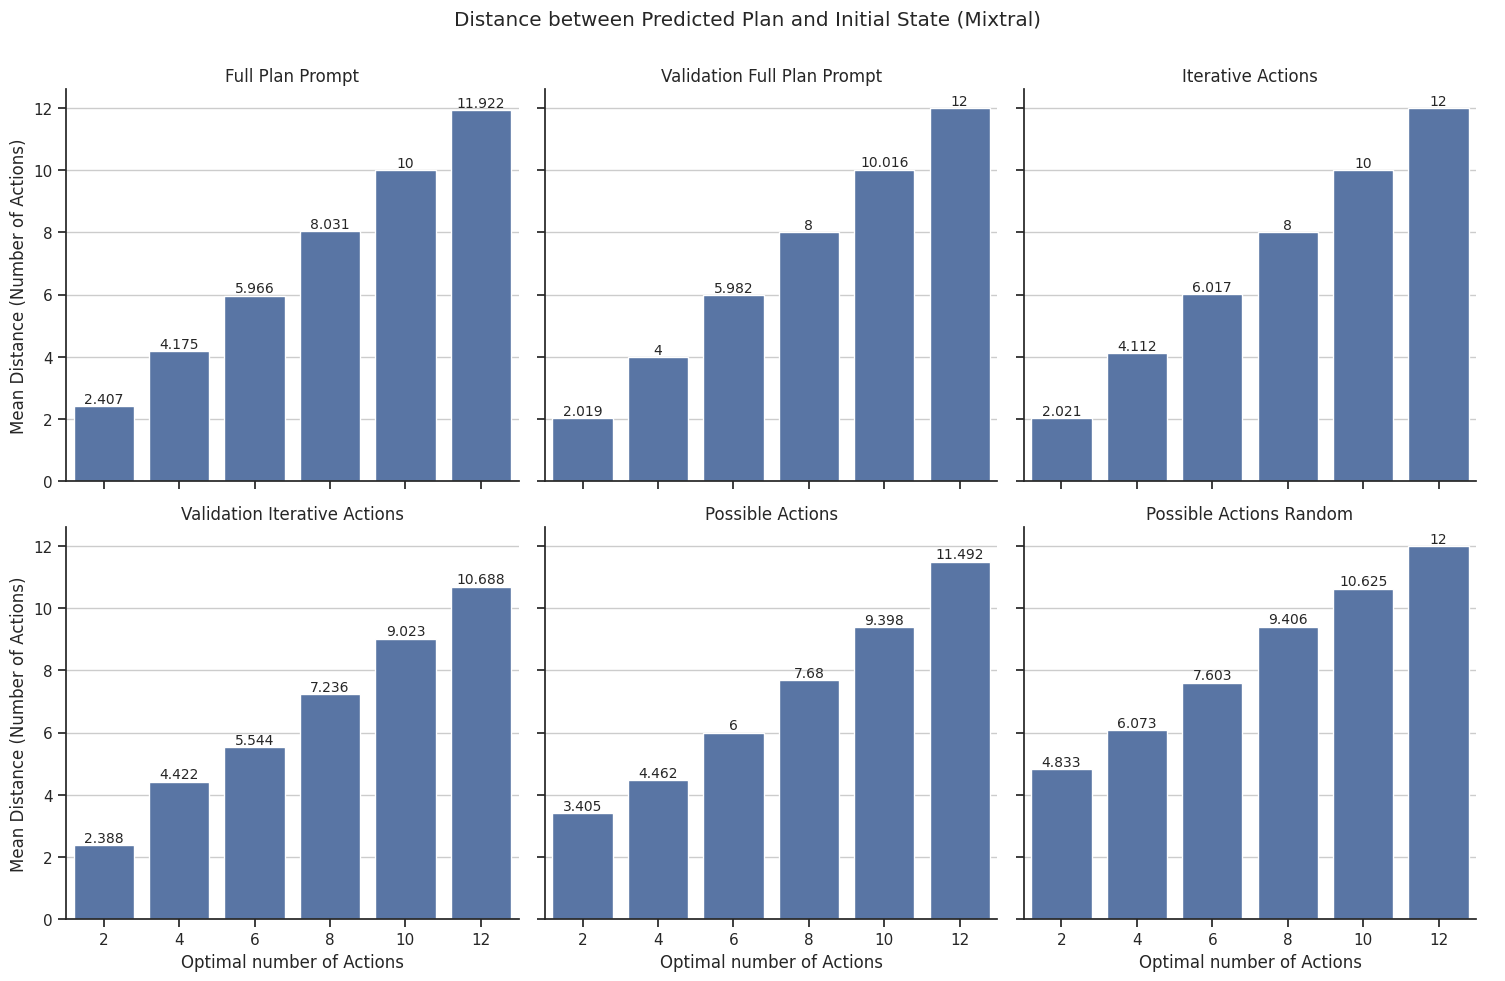

In [30]:
data = df[df["correct_response"] == False]
data = data.groupby(["method", "ground_truth_n_actions"], as_index=False)["distance_to_ground_truth"].agg(["mean", "std", "count", "median"]).dropna().round(3)
data["method"] = data["method"].apply(method_number_to_name)

ax = sn.catplot(data, col="method", y="mean", x="ground_truth_n_actions", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("Distance between Predicted Plan and Initial State (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.yaxis.grid(True)
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Mean Distance (Number of Actions)")

In [15]:
df = pd.read_csv("metrics_2.csv")

In [18]:
data = df[df["goal_achieved"] == False]

In [20]:
data[data["method"] == 4]["distance_to_ground_truth"].unique()

array([ 8, 12,  6,  7, 10,  4,  5,  9,  2, 11,  3,  1])

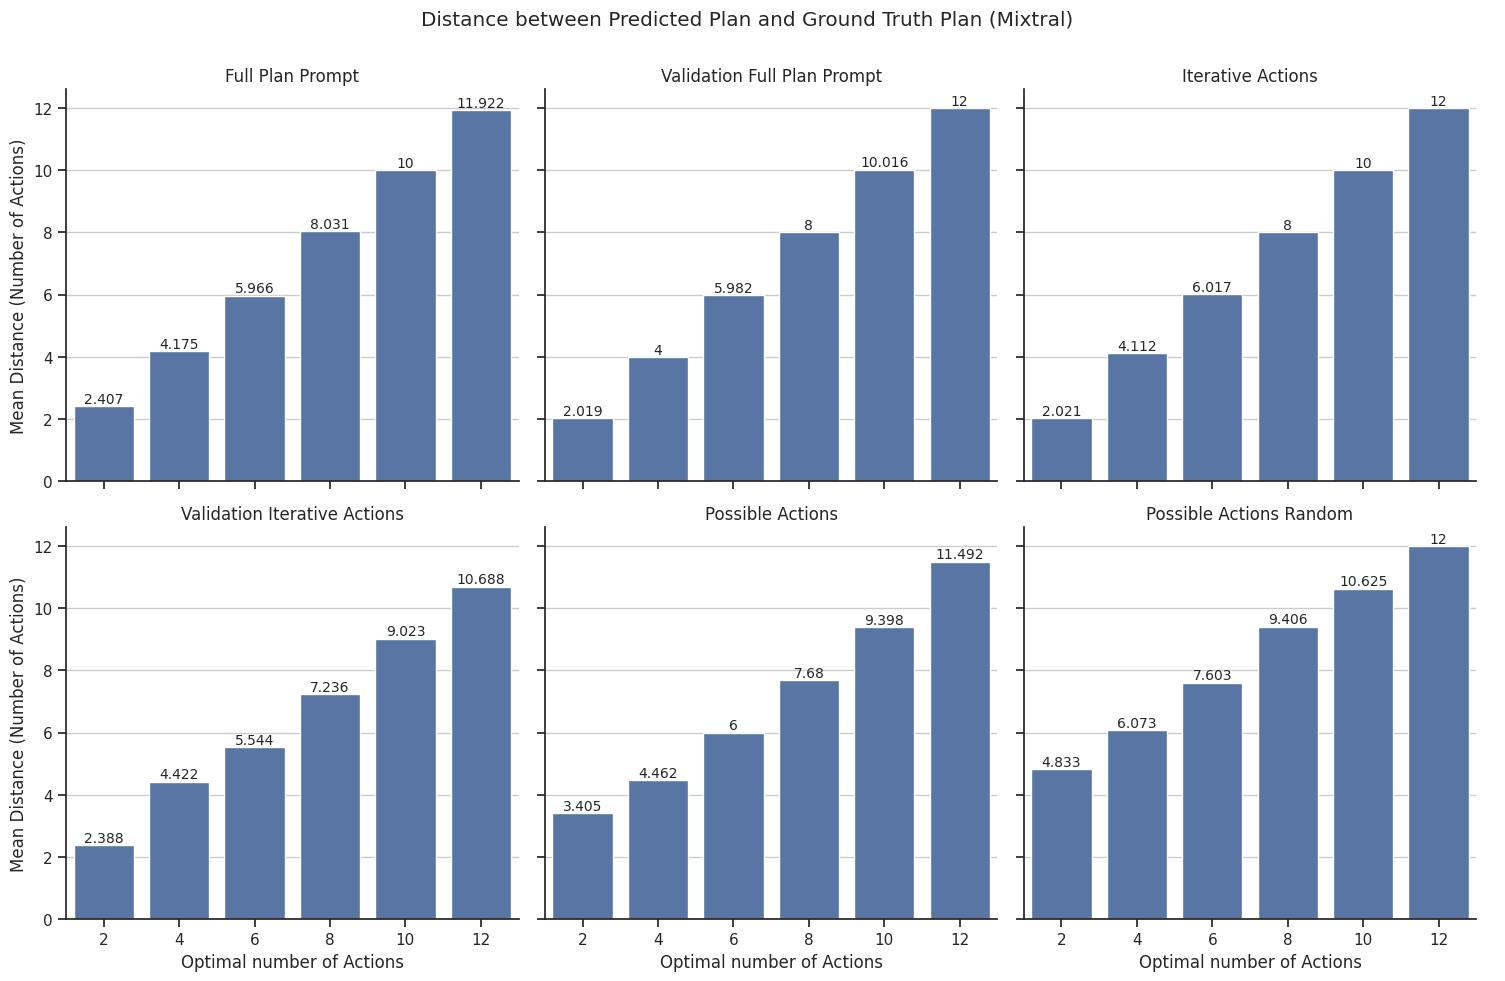

In [7]:
data = df[df["correct_response"] == False]
data = data.groupby(["method", "ground_truth_n_actions"], as_index=False)["distance_to_ground_truth"].agg(["mean", "std", "count", "median"]).dropna().round(3)
data["method"] = data["method"].apply(method_number_to_name)

ax = sn.catplot(data, col="method", y="mean", x="ground_truth_n_actions", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("Distance between Predicted Plan and Ground Truth Plan (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.yaxis.grid(True)
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Mean Distance (Number of Actions)")

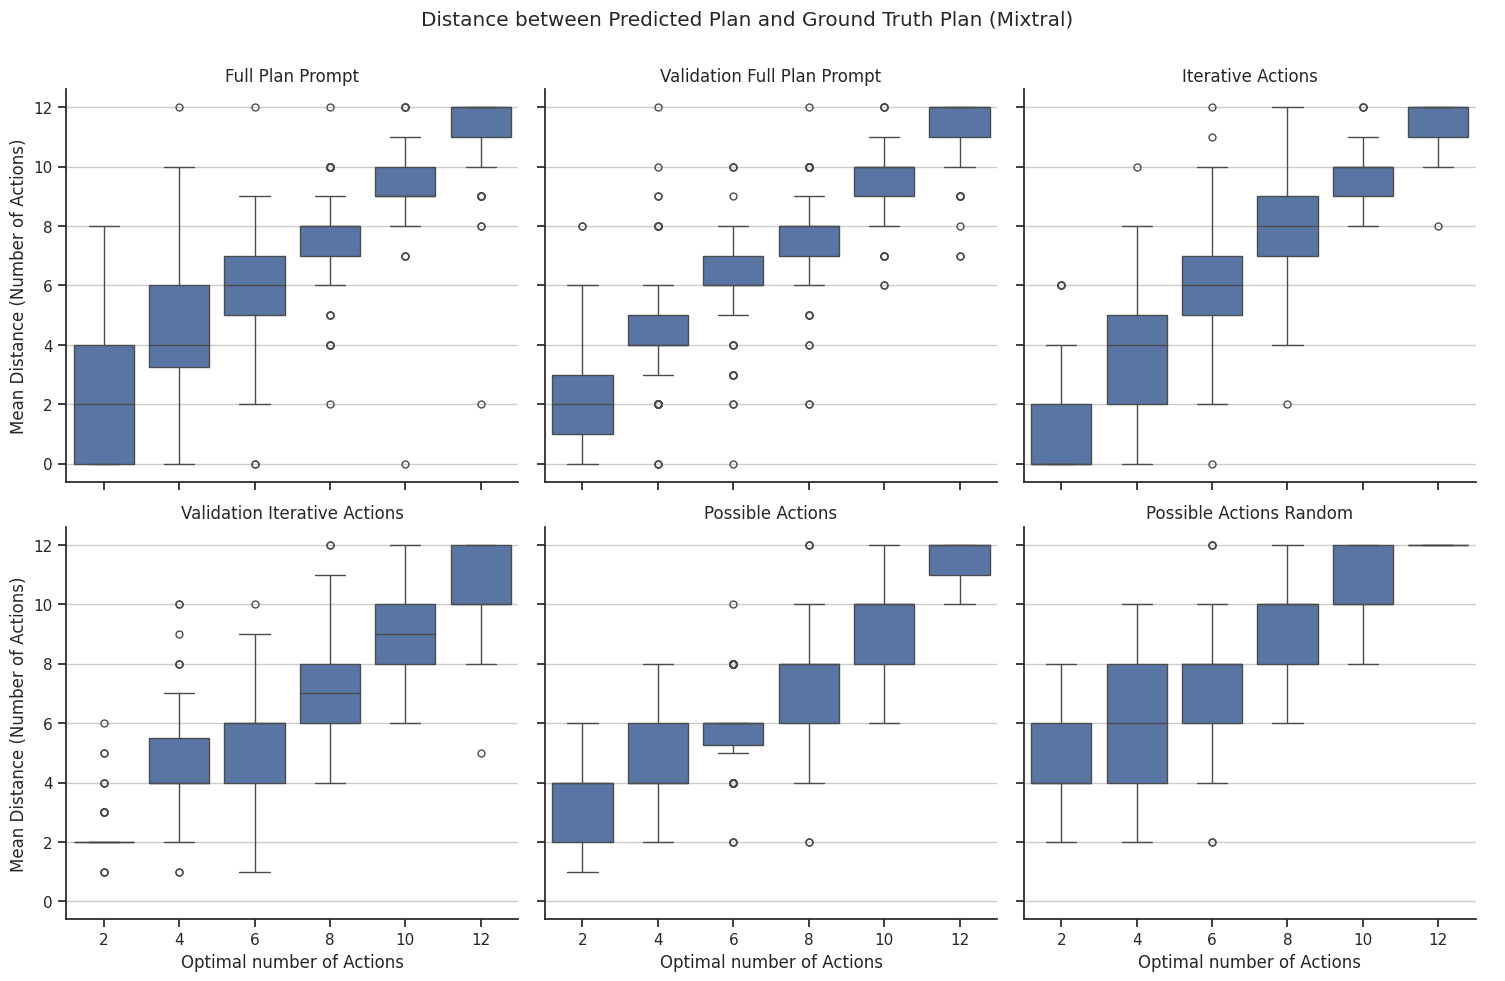

In [26]:
data = df[df["correct_response"] == False]
#data["method"] = data["method"].apply(method_number_to_name)

ax = sn.catplot(data, col="method", y="distance_to_ground_truth", x="ground_truth_n_actions", kind="box", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("Distance between Predicted Plan and Ground Truth Plan (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.yaxis.grid(True)
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Mean Distance (Number of Actions)")

In [27]:
data

,instance_id,ground_truth_plan,goal_achieved,content,actions_text,actions_possible,n_actions,ground_truth_n_actions,correct_response,n_run,method,all_possible_actions,method_name,distance_to_ground_truth
0,1657,(unstack b a)\n(put-down b)\n(unstack a c)\n(s...,False,human: I am playing with a set of blocks where...,unstack the blue block from on top of the red ...,1.1.0.0.1.0,6,10,False,1,2,False,Iterative Actions,9
1,1819,(unstack d c)\n(put-down d)\n(unstack c a)\n(p...,False,human: I am playing with a set of blocks where...,the next best action is: unstack the yellow b...,0,2,12,False,1,2,False,Iterative Actions,12
3,1280,(unstack d a)\n(stack d c)\n(unstack a b)\n(pu...,False,human: I am playing with a set of blocks where...,unstack the yellow block from on top of the re...,1.1.0.0.1.0.0.0,8,10,False,1,2,False,Iterative Actions,9
4,1451,(pick-up d)\n(stack d b)\n,False,human: I am playing with a set of blocks where...,pick up the yellow block.put down the yellow b...,1.1.0.0.0,5,2,False,1,2,False,Iterative Actions,2
5,1447,(unstack a b)\n(put-down a)\n(unstack d c)\n(p...,False,human: I am playing with a set of blocks where...,unstack the red block from on top of the blue ...,1.1.1.0,4,6,False,1,2,False,Iterative Actions,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602,10,(pick-up c)\n(stack c a)\n,False,Random Choice\n,pick up the yellow block.stack the yellow bloc...,1.1.1.1.1.1.1.1.1.1,10,2,False,1,5,NaN,Possible Actions Random,6
4603,956,(unstack c d)\n(put-down c)\n(unstack d b)\n(p...,False,Random Choice\n,unstack the orange block from on top of the ye...,1.1.1.1.1.1.1.1.1.1,10,6,False,1,5,NaN,Possible Actions Random,6
4604,876,(unstack a b)\n(put-down a)\n(unstack b d)\n(p...,False,Random Choice\n,unstack the red block from on top of the blue ...,1.1.1.1.1.1.1.1.1.1,10,12,False,1,5,NaN,Possible Actions Random,12
4605,1093,(unstack b d)\n(put-down b)\n(unstack d c)\n(p...,False,Random Choice\n,unstack the blue block from on top of the yell...,1.1.1.1.1.1.1.1.1.1,10,8,False,1,5,NaN,Possible Actions Random,8


In [31]:
df = pd.read_csv("metrics_3.csv")

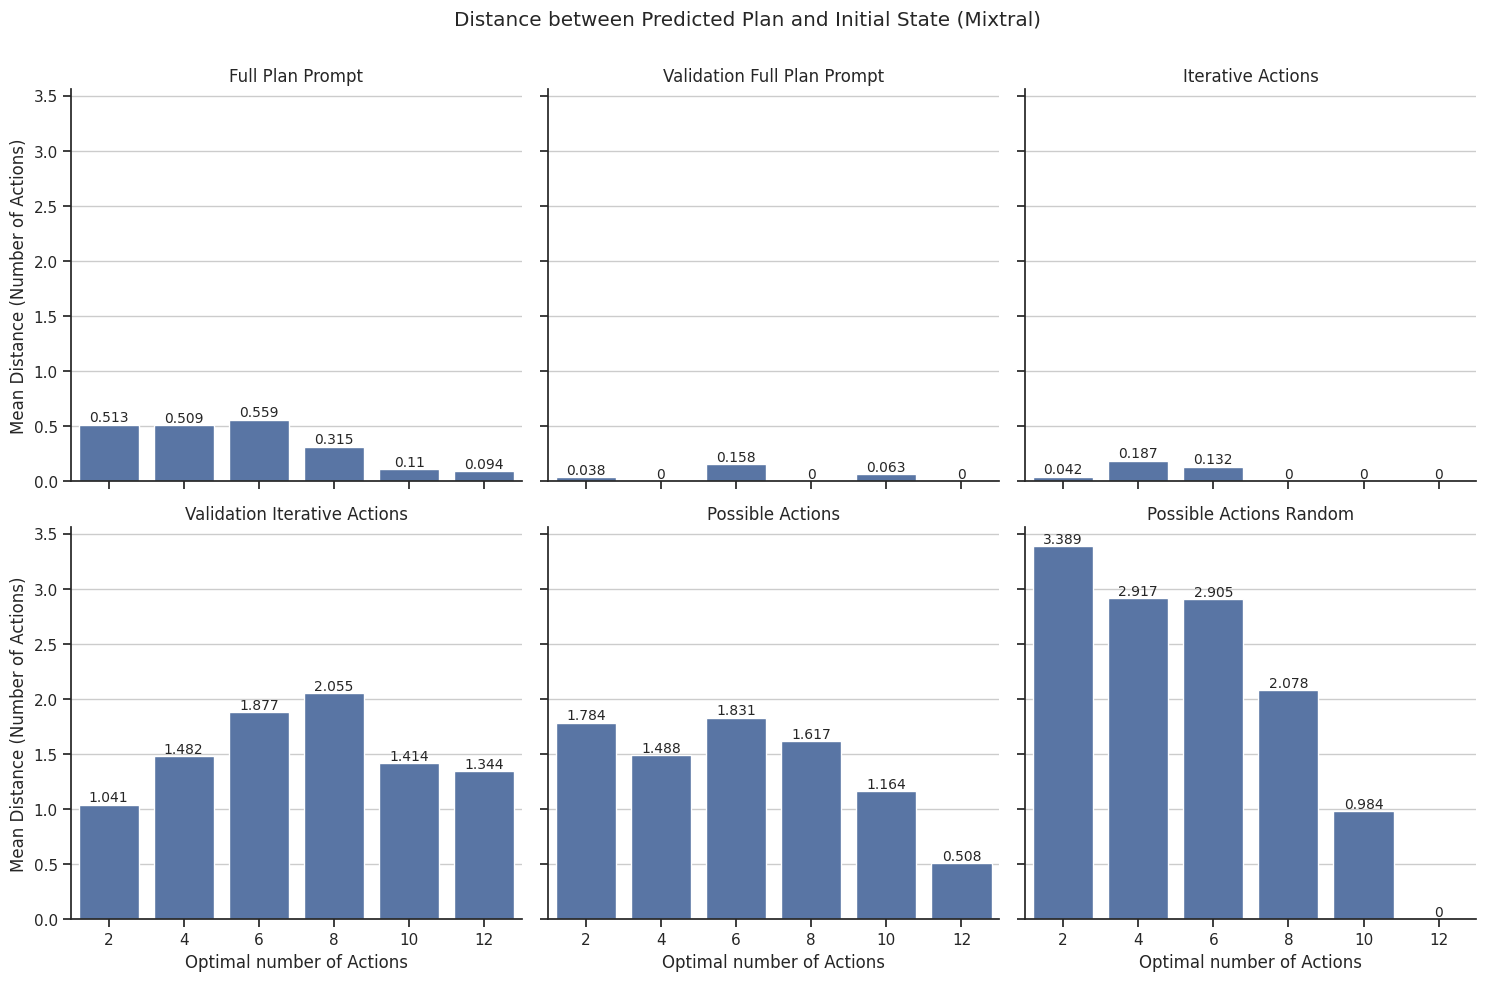

In [32]:
data = df[df["correct_response"] == False]
data = data.groupby(["method", "ground_truth_n_actions"], as_index=False)["distance_to_ground_truth"].agg(["mean", "std", "count", "median"]).dropna().round(3)
data["method"] = data["method"].apply(method_number_to_name)

ax = sn.catplot(data, col="method", y="mean", x="ground_truth_n_actions", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("Distance between Predicted Plan and Initial State (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.yaxis.grid(True)
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Mean Distance (Number of Actions)")

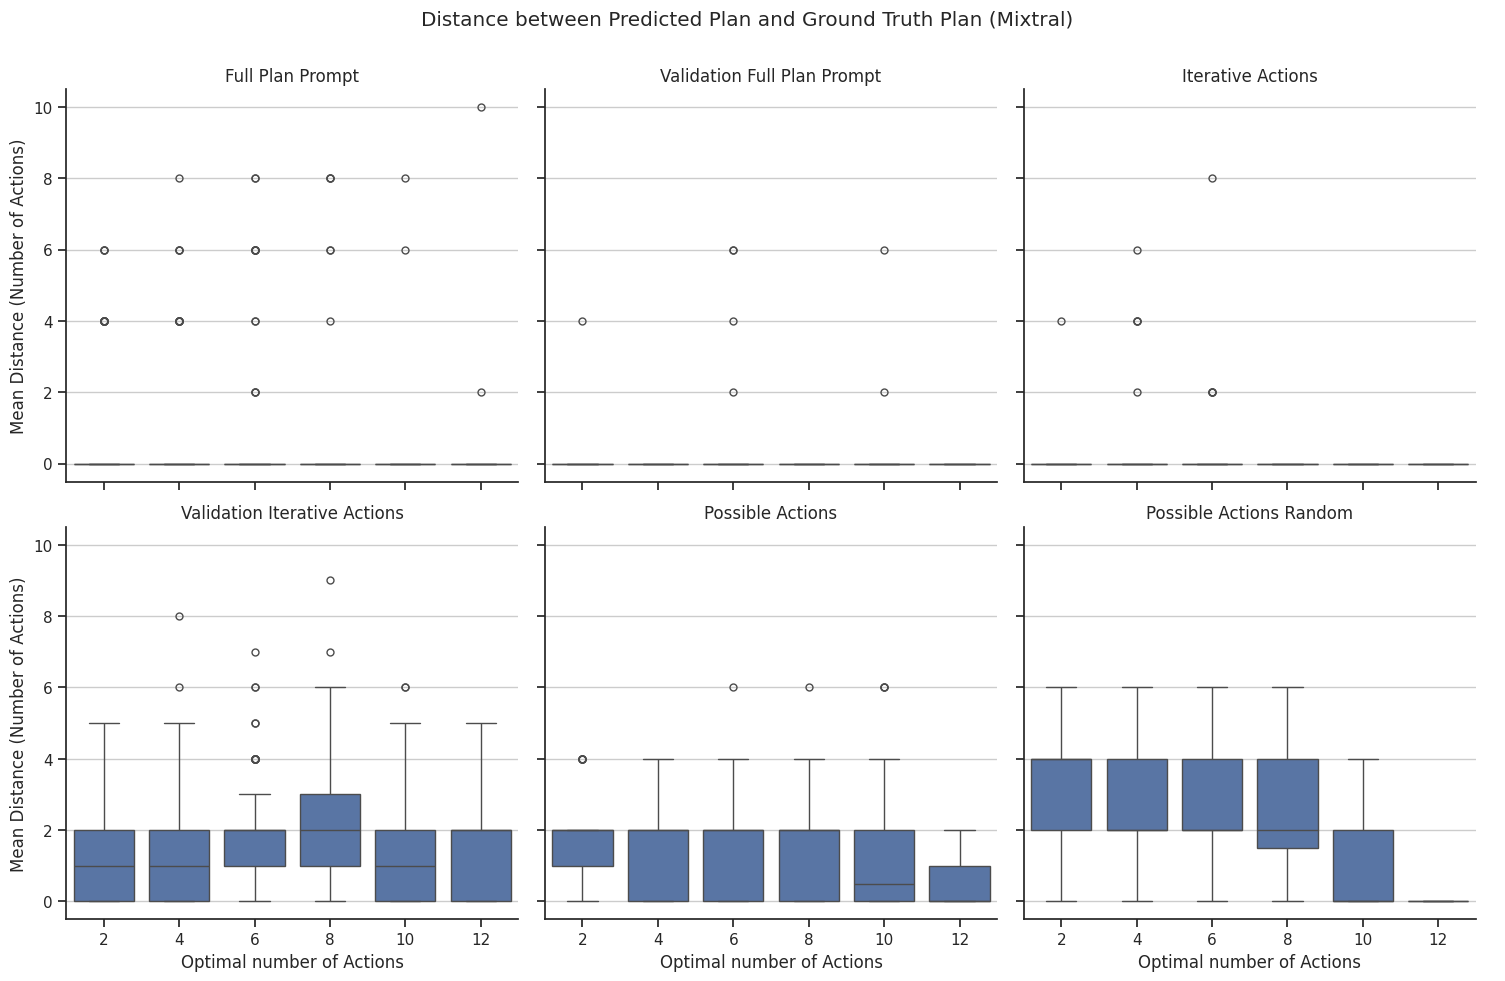

In [33]:
data = df[df["correct_response"] == False]
#data["method"] = data["method"].apply(method_number_to_name)

ax = sn.catplot(data, col="method", y="distance_to_ground_truth", x="ground_truth_n_actions", kind="box", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("Distance between Predicted Plan and Ground Truth Plan (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.yaxis.grid(True)
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Mean Distance (Number of Actions)")

In [11]:
df = get_df_from_folder("experiments_results/mixtral_4_iter_10_with_possible_actions")

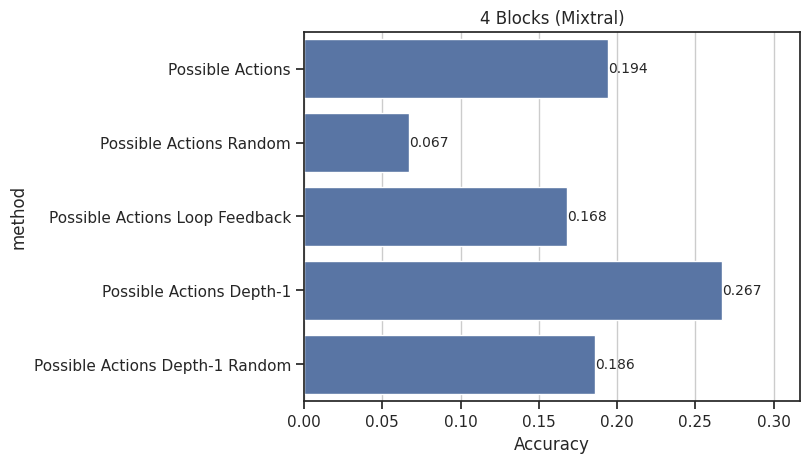

In [12]:
acc_by_method = df.groupby("method", as_index=False)["correct_response"].mean().round(3)
acc_by_method["method"] = acc_by_method["method"].apply(method_number_to_name)
ax = sn.barplot(acc_by_method, x="correct_response", y="method", orient="h")
ax.xaxis.grid(True)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlim([0, max(acc_by_method["correct_response"])+0.05])
ax.set_xlabel("Accuracy");
ax.set_title("4 Blocks (Mixtral)");

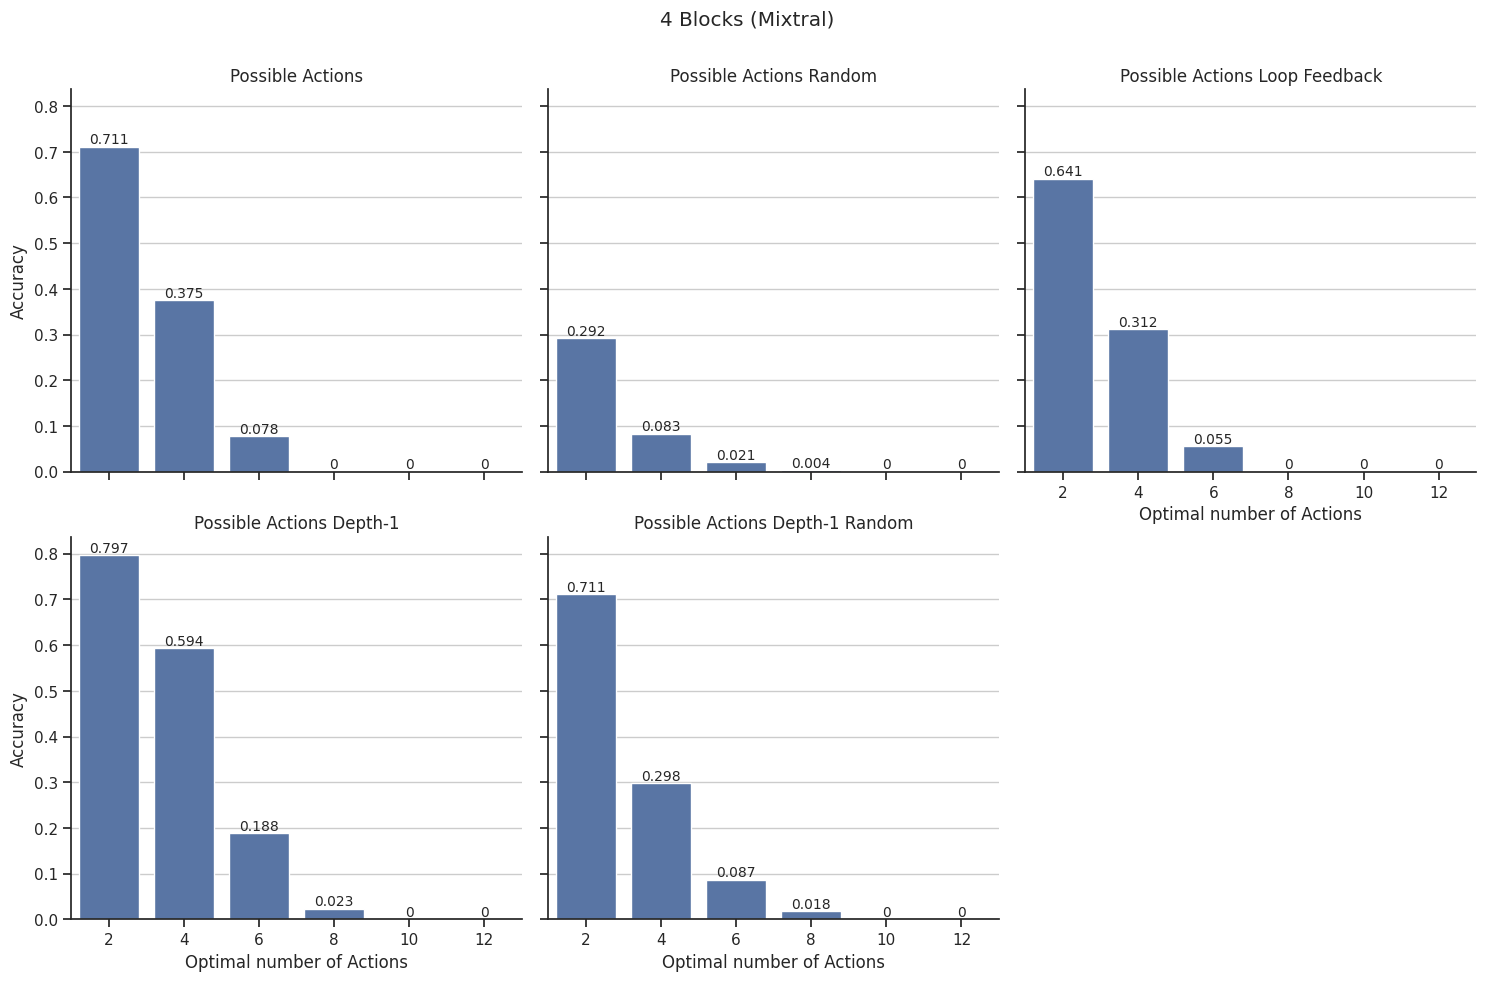

In [13]:
acc_by_method_gd_actions = df.groupby(["method", "ground_truth_n_actions"], as_index=False)["correct_response"].mean()
acc_by_method_gd_actions["correct_response"] = acc_by_method_gd_actions["correct_response"].round(3)
acc_by_method_gd_actions["method"] = acc_by_method_gd_actions["method"].apply(method_number_to_name)
ax = sn.catplot(acc_by_method_gd_actions, col="method", y="correct_response", x="ground_truth_n_actions", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("4 Blocks (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.yaxis.grid(True)
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Accuracy")

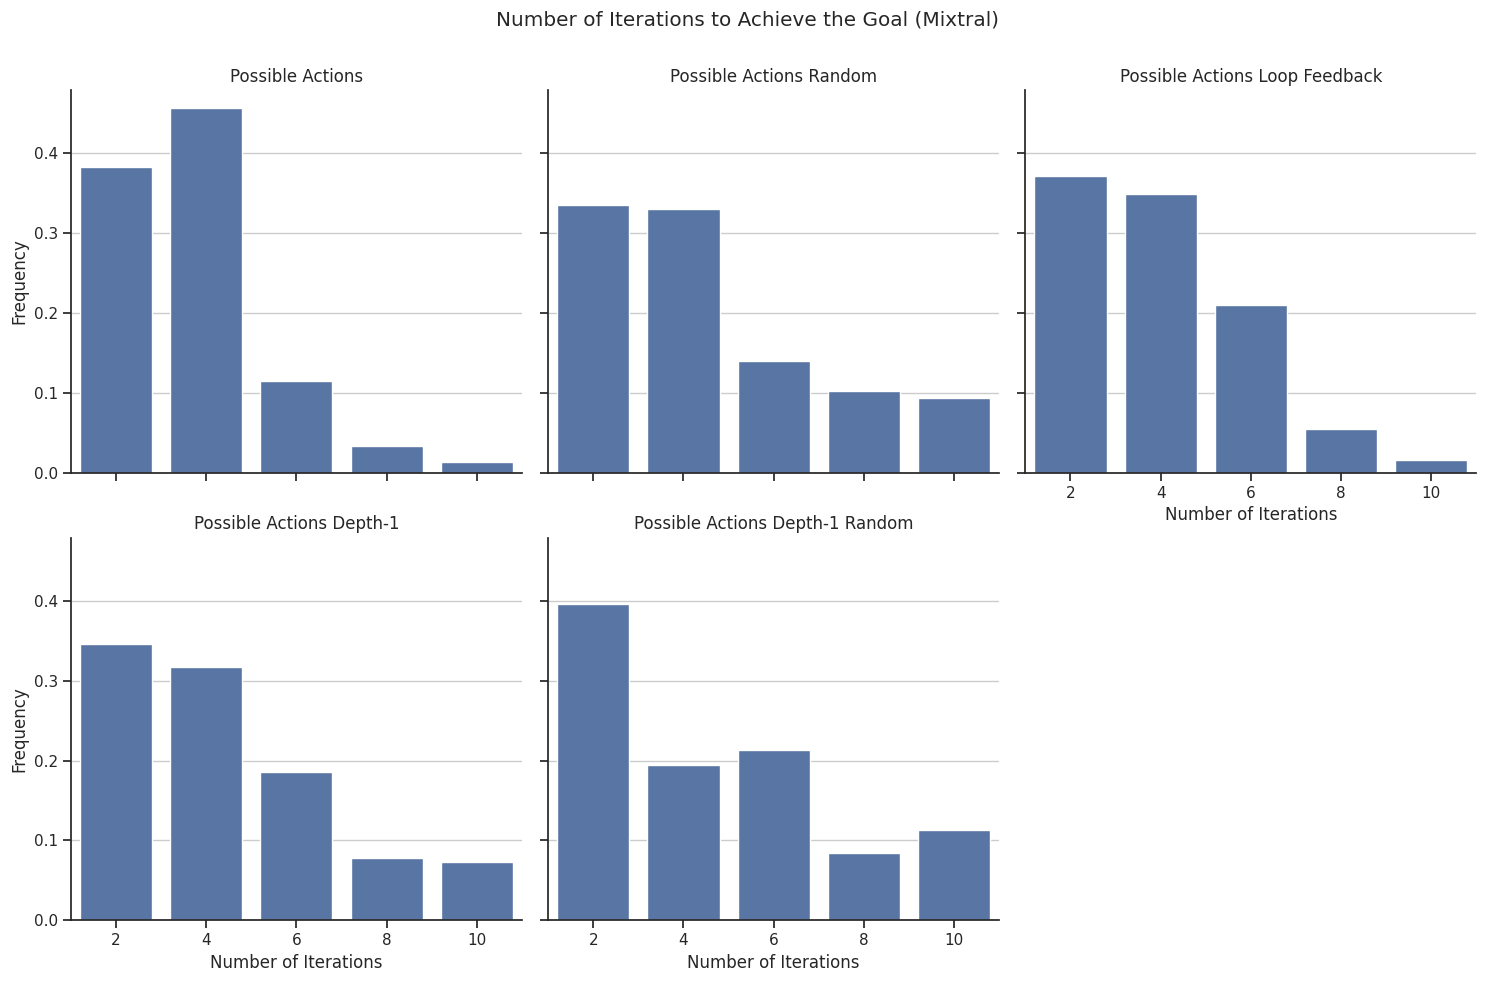

In [14]:
data = df[df["correct_response"] == True]

data["iterations"] = data["n_actions"]

method_sum = data.groupby("method", as_index=False)["iterations"].count()
method_sum["method"] = method_sum["method"].apply(method_number_to_name)
iterations_by_method_gd_actions = data.groupby(["method", "iterations"], as_index=False)["correct_response"].count()
iterations_by_method_gd_actions["method"] = iterations_by_method_gd_actions["method"].apply(method_number_to_name)

frequencies = []
for i in range(iterations_by_method_gd_actions.shape[0]):
    row = iterations_by_method_gd_actions.iloc[i]
    method = row["method"]
    sum_iterations = method_sum[method_sum["method"] == method]["iterations"].values[0]
    frequency = row["correct_response"] / sum_iterations
    frequencies.append(frequency)
    
iterations_by_method_gd_actions["correct_response"] = frequencies

ax = sn.catplot(iterations_by_method_gd_actions, col="method", y="correct_response", x="iterations", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("Number of Iterations to Achieve the Goal (Mixtral)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.yaxis.grid(True)
    ax.set_xlabel("Number of Iterations")
    ax.set_ylabel("Frequency")

In [15]:
df = get_df_from_folder("experiments_results/mixtral_4_iter_10")
df_iter = get_df_from_folder("experiments_results/mixtral_4_iter_16")

df["iter"] = "5-10"
df_iter["iter"] = "8-16"

df = pd.concat([df, df_iter])

acc_by_method = df.groupby(["iter", "method"], as_index=False)["correct_response"].mean().round(3)
acc_by_method["method"] = acc_by_method["method"].apply(method_number_to_name)

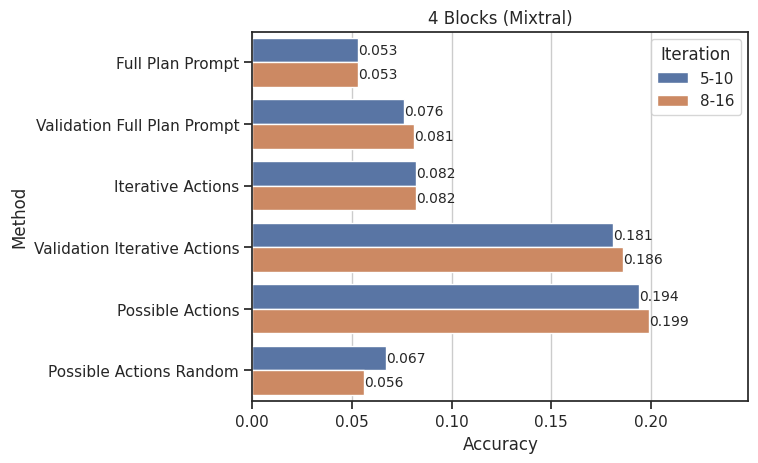

In [16]:
ax = sn.barplot(acc_by_method, x="correct_response", y="method", orient="h", hue="iter")
ax.xaxis.grid(True)
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.set_xlim([0, max(acc_by_method["correct_response"])+0.05])
ax.set_xlabel("Accuracy");
ax.set_ylabel("Method")
ax.legend(title="Iteration")
ax.set_title("4 Blocks (Mixtral)");

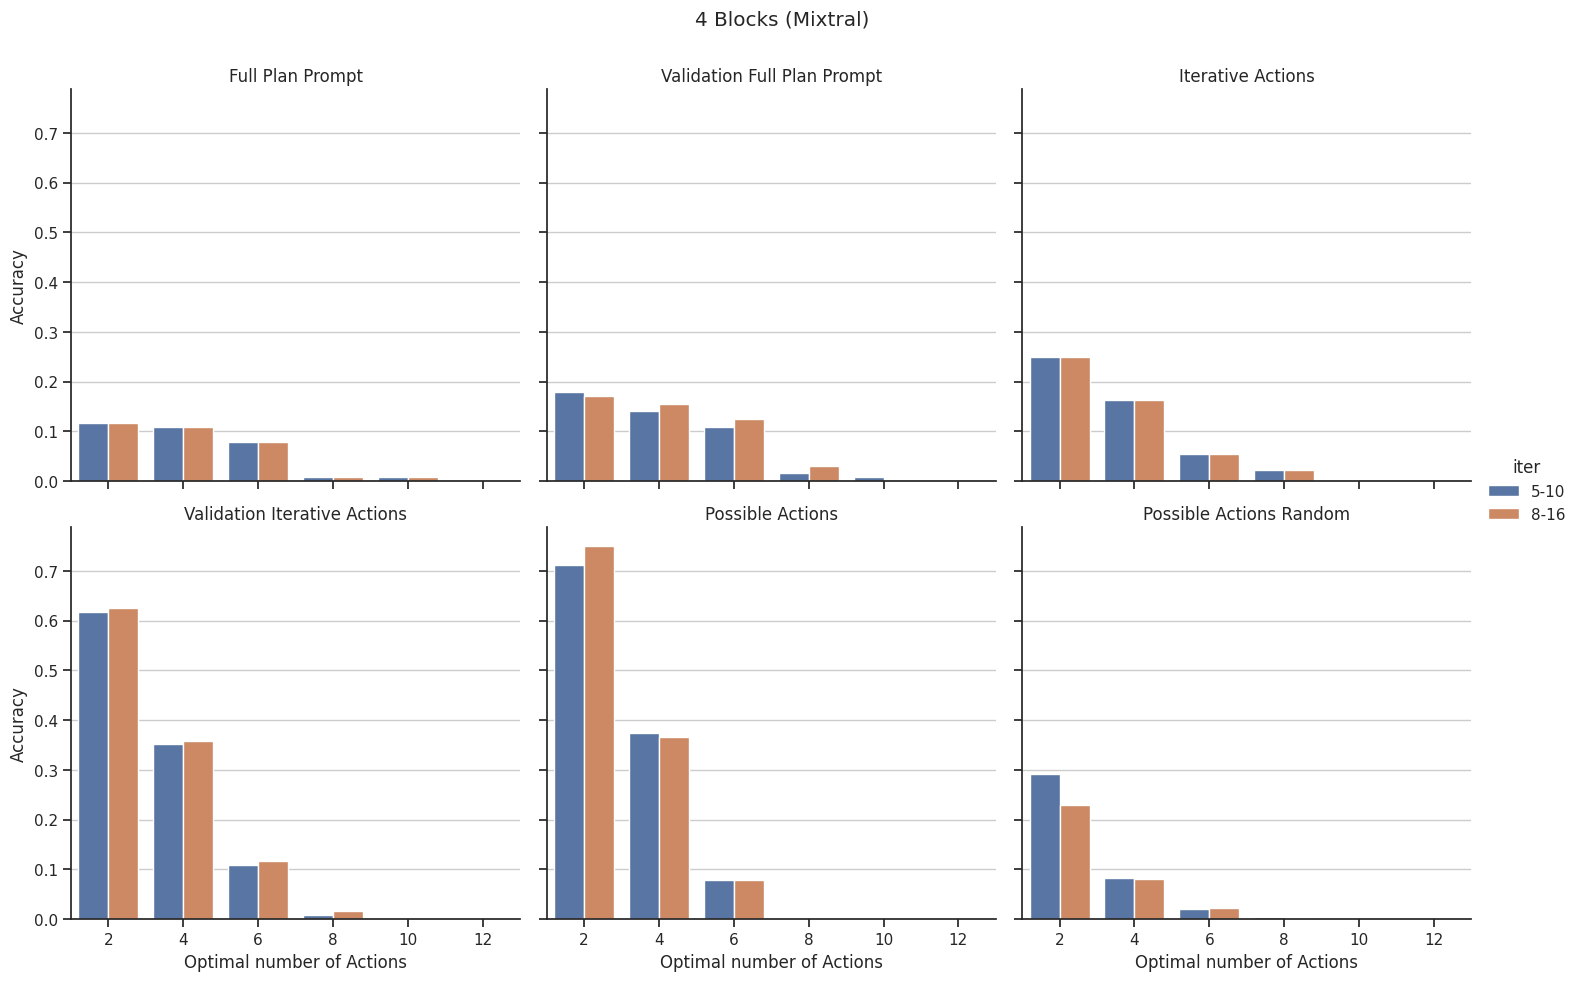

In [17]:
acc_by_method_gd_actions = df.groupby(["iter", "method", "ground_truth_n_actions"], as_index=False)["correct_response"].mean()
acc_by_method_gd_actions["correct_response"] = acc_by_method_gd_actions["correct_response"].round(3)
acc_by_method_gd_actions["method"] = acc_by_method_gd_actions["method"].apply(method_number_to_name)
ax = sn.catplot(acc_by_method_gd_actions, col="method", y="correct_response", x="ground_truth_n_actions", kind="bar", col_wrap=3, hue="iter")
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("4 Blocks (Mixtral)");
method_names = list(map(method_number_to_name, [0, 1, 2, 3, 4, 5]))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.yaxis.grid(True)
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Accuracy")

In [18]:
df = get_df_from_folder("experiments_results/llama70_4_iter_10")

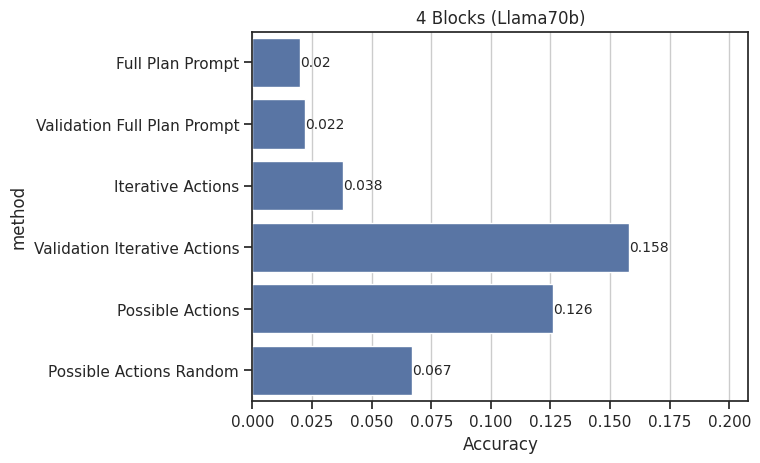

In [20]:
acc_by_method = df.groupby("method", as_index=False)["correct_response"].mean().round(3)
acc_by_method["method"] = acc_by_method["method"].apply(method_number_to_name)
ax = sn.barplot(acc_by_method, x="correct_response", y="method", orient="h")
ax.xaxis.grid(True)
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_xlim([0, max(acc_by_method["correct_response"])+0.05])
ax.set_xlabel("Accuracy");
ax.set_title("4 Blocks (Llama70b)");

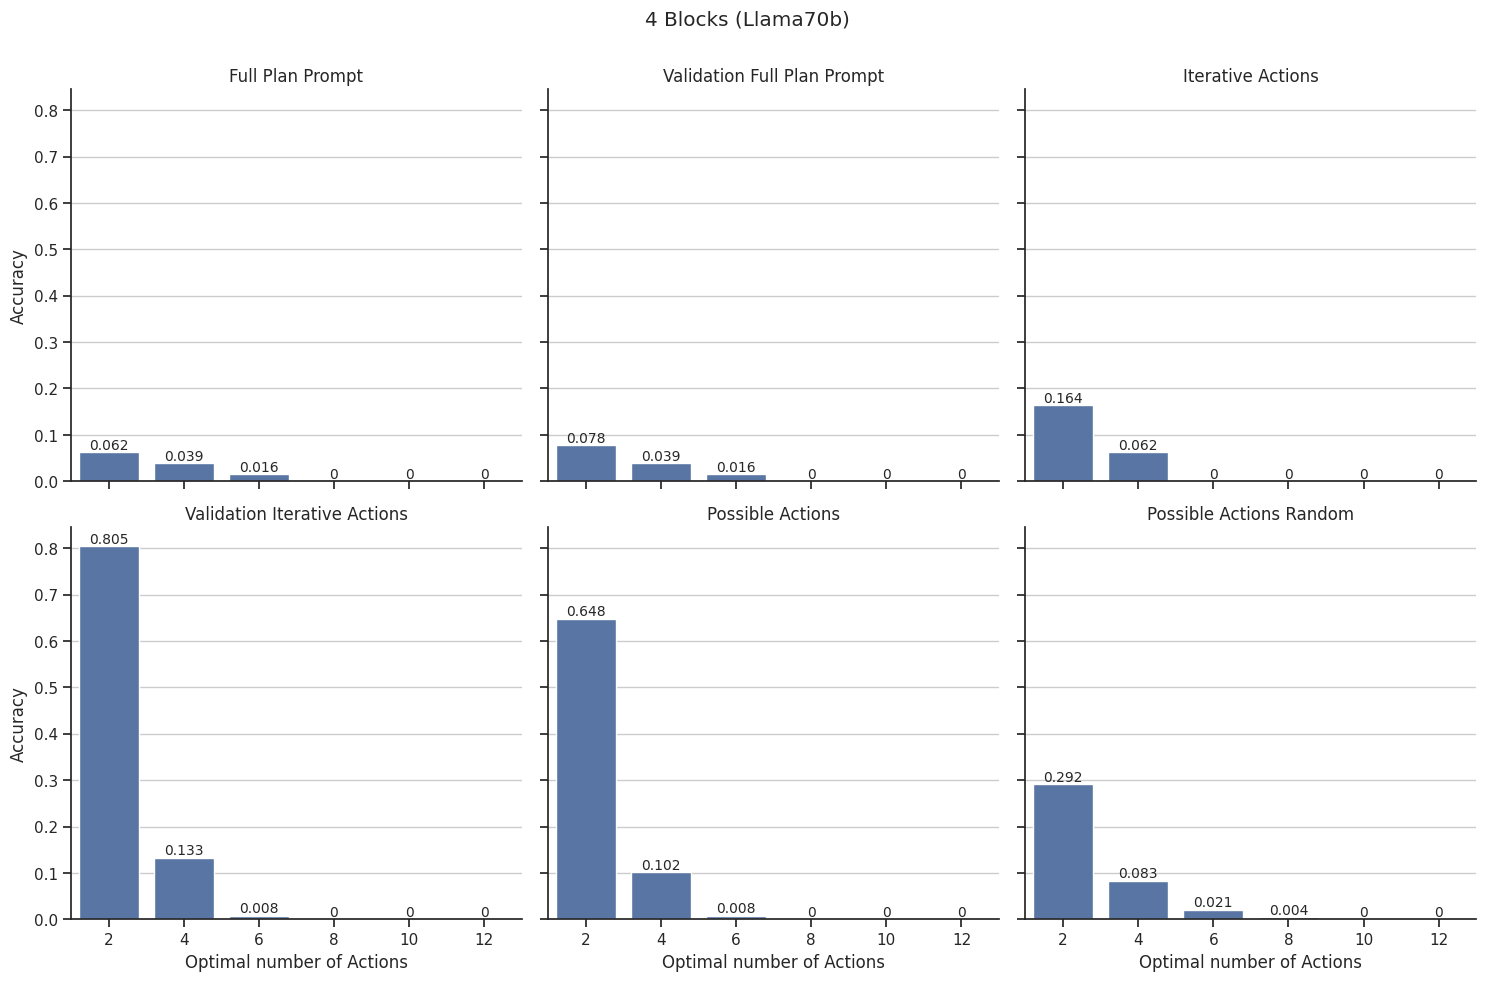

In [22]:
acc_by_method_gd_actions = df.groupby(["method", "ground_truth_n_actions"], as_index=False)["correct_response"].mean()
acc_by_method_gd_actions["correct_response"] = acc_by_method_gd_actions["correct_response"].round(3)
acc_by_method_gd_actions["method"] = acc_by_method_gd_actions["method"].apply(method_number_to_name)
ax = sn.catplot(acc_by_method_gd_actions, col="method", y="correct_response", x="ground_truth_n_actions", kind="bar", col_wrap=3)
ax.figure.subplots_adjust(top=0.9)
ax.figure.suptitle("4 Blocks (Llama70b)");
method_names = list(map(method_number_to_name, sorted(df["method"].unique())))
for i, ax in enumerate(ax.axes_dict.values()):
    ax.set_title(method_names[i])
    ax.yaxis.grid(True)
    ax.bar_label(ax.containers[0], fontsize=10);
    ax.set_xlabel("Optimal number of Actions")
    ax.set_ylabel("Accuracy")